In [ ]:
import numpy as np
import pandas as pd
from hooli_data_eng.defs.custom_ingest.resources import _random_times
from hooli_data_eng.defs.pandas.assets import model_func

# import plotly.express as px
from plotnine import ggplot, geom_point, stat_smooth, aes

In [2]:
# for local testing we use sample data, this will be replaced at runtime by the dagster asset
weekly_order_summary = pd.DataFrame(
    {"order_date": _random_times(100), "num_orders": np.random.normal(10, 5, 100)}
)
# this will be replaced by the trained model parameters
order_forecast_model = tuple([5, 5])

100


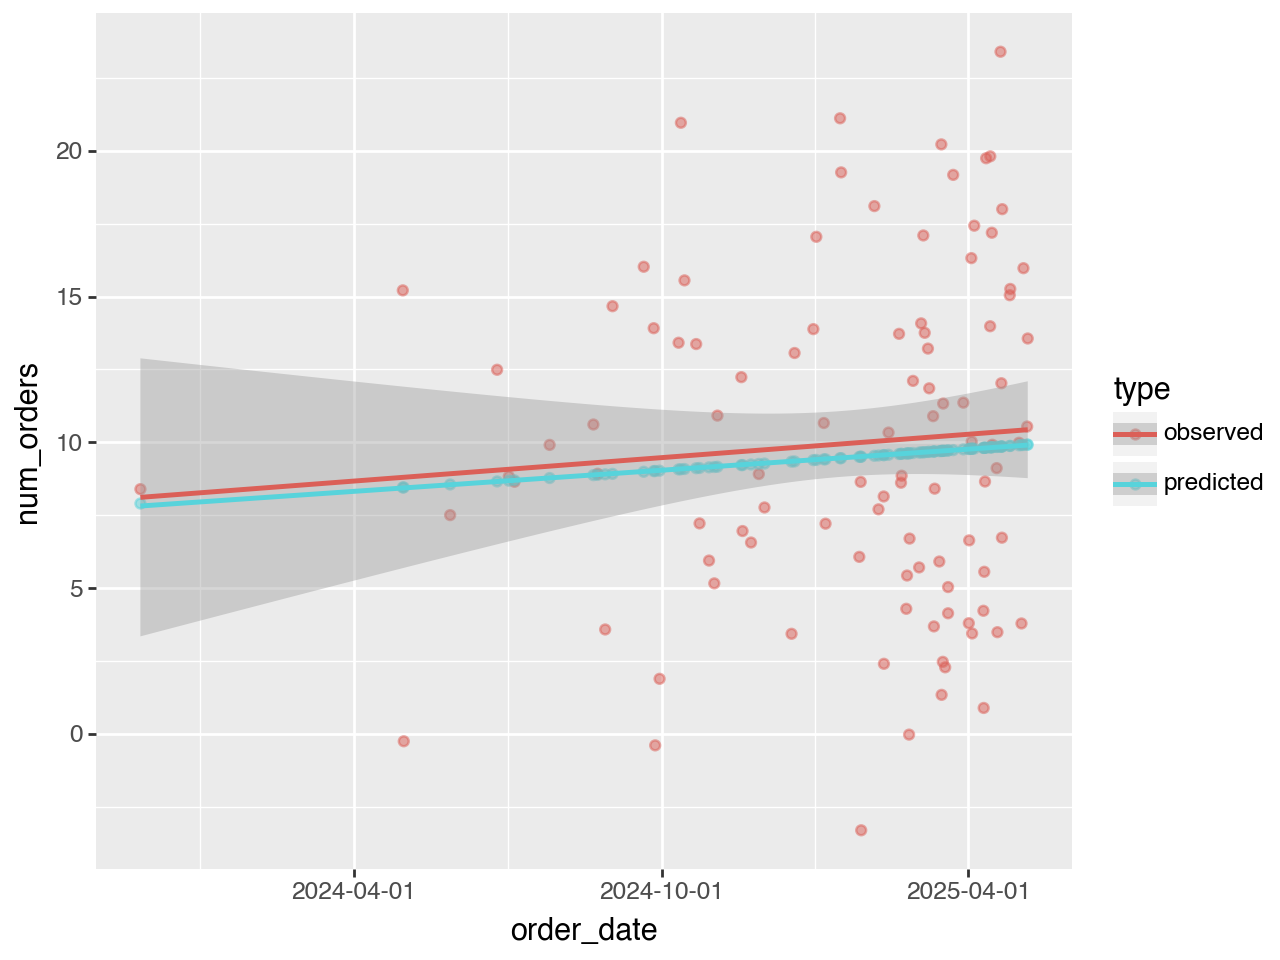

In [3]:
# generate predictions for the true data
a, b = order_forecast_model

daily_order_preds = pd.DataFrame(
    {
        "order_date": weekly_order_summary["order_date"],
        "num_orders": model_func(
            weekly_order_summary["order_date"].astype(np.int64), a, b
        ),
    }
)
weekly_order_summary["type"] = "observed"
daily_order_preds["type"] = "predicted"

print(len(weekly_order_summary))

combined = pd.concat([weekly_order_summary, daily_order_preds])
(
    ggplot(combined, aes("order_date", "num_orders", color="type"))
    + geom_point(alpha=0.5)
    + stat_smooth(method="lm")
)

# - Interactive plots (not currently supported in dagit notebook rendering)
# weekly_order_summary = weekly_order_summary.sort_values(by="order_date")
# weekly_order_summary['num_orders_predicted'] = model_func(weekly_order_summary['order_date'].astype(np.int64), a, b)
# weekly_order_summary = weekly_order_summary.sort_values(by="order_date")
# fig = px.line(weekly_order_summary, x="order_date", y=['num_orders', 'num_orders_predicted'], markers=True)
# fig.show()